# Assignment 3: Graph Visualization

### Course: DATA 620
### Submission Date: 6/11/2023

### Homework Team: Coffy Andrews and Tora Mullings

[GitHub Source Code]("https://github.com/candrewxs/D620/tree/main/Assignment3")

The objective of this week's assignment:
- Load a graph database
- Create basic analysis on the graph, including the graph's diameter, and at least one other metric of your choosing
- Select and use a visualization tool to display information 


#### Load Required Packages

In [111]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import gzip
import urllib.request # fetch data and parse it

from networkx import algorithms
import queue  #subgraph

# disable warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Import Data

In this social network analysis, we will use a dataset from the Stanford University commonly known as **SNAP**. SNAP large network dataset collection website can be assessed from this link: [SNAP]("http://snap.stanford.edu/data/index.html#p2p") 

The **Gnutella peer-to-peer network, August 8 2022** database was selected from the *Internet networks* collection where nodes represents computers and edges communication.



In [7]:
def print_graph_stats(title, g):
    print("Simple stats for: " + title)
    print("Number of nodes: " + str(len(g.nodes())))
    print("Number of edges: " + str(len(g.edges())))
    print("Graph density: " + str(nx.density(g)))
    print("Is graph connected? " + str(nx.is_connected(g)))
    print("Graph type: " + str(type(g)))
    
# Download file from SNAP and uncompress it.
response = urllib.request.urlopen('https://snap.stanford.edu/data/p2p-Gnutella08.txt.gz')
with open('p2p-Gnutella08.txt', 'wb') as outfile:
    outfile.write(gzip.decompress(response.read()))

g = nx.read_edgelist('p2p-Gnutella08.txt')
print_graph_stats("Gnutella p2p network", g)

Simple stats for: Gnutella p2p network
Number of nodes: 6301
Number of edges: 20777
Graph density: 0.0010467978123905755
Is graph connected? False
Graph type: <class 'networkx.classes.graph.Graph'>


The graph statistics above provides some simple information on the *Gnutella p2p network*. The network graph density is only about 0.1 percent and is considered low because only one out of about 1,000 possible edges exists in the graph.



In [90]:
# finding triadic closure

triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.020659879260070572


Triadic closure refers to the tendency for nodes with a common connection to form new connections with each other. A value of 0.02 indicates the probability of this triadic closure happening in a network, where 2% of the possible triads result in new connections.

In [8]:
# query for all of the node and edges in the graph
list(g.edges(data = True))[0:10], list(g.nodes(data = True))[0:10]

([('0', '1', {}),
  ('0', '2', {}),
  ('0', '3', {}),
  ('0', '4', {}),
  ('0', '5', {}),
  ('0', '6', {}),
  ('0', '7', {}),
  ('0', '8', {}),
  ('0', '9', {}),
  ('0', '10', {})],
 [('0', {}),
  ('1', {}),
  ('2', {}),
  ('3', {}),
  ('4', {}),
  ('5', {}),
  ('6', {}),
  ('7', {}),
  ('8', {}),
  ('9', {})])

The network graph has no metadata attached to nodes, meaning that there is no additional information or attributes associated with the nodes beyond their connections or relationships with other nodes. In this case, the graph focuses solely on the structure of the network and the links between nodes.

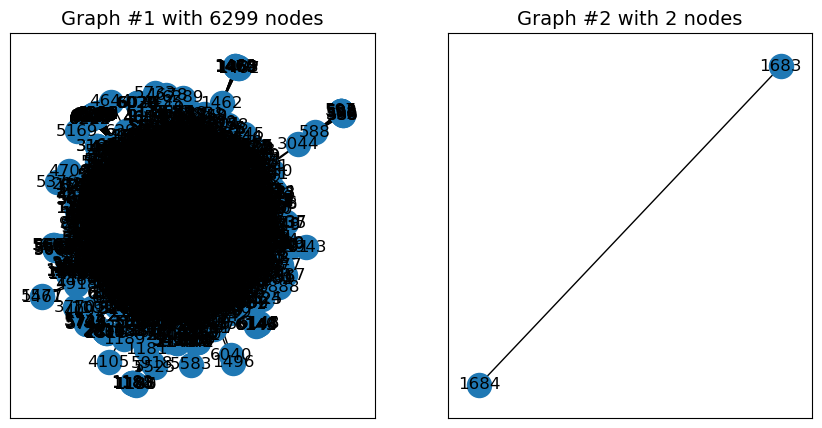

In [9]:
# plot the entire network graph
graphs = list(g.subgraph(c) for c in nx.connected_components(g))

plt.figure(figsize = (16, 11))
for i, graph in enumerate(graphs):
    
    plt.subplot(2, 3, i + 1)
    nx.draw_networkx(graph)
    title = 'Graph #' + str(i + 1) + " with " + str(len(graph)) + ' nodes'
    plt.title(title, size = 14)
plt.show()

In [17]:
components = list(nx.connected_components(g.to_undirected()))
comp_count = len(components)
print('The total number of seperated subgraphs or components is',comp_count)

The total number of seperated subgraphs or components is 2


#### Network Graph Basic Analysis

*Creating a subgraph for network analysis to focus on a specific subset of nodes and edges within the larger network.*

In [95]:
# function for get subgraph

def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

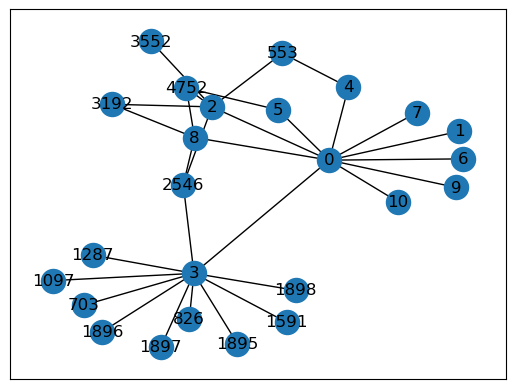

In [100]:
# get subgraph with 25 nodes
#start at node one and pull 25 closest nodes

subgraph = get_subgraph_bfs(g, '1', 25)
# draw subgraph

nx.draw_networkx(subgraph)
plt.savefig("subgraph.png")

In [99]:
# diameter
print("Diameter of Network: ", nx.diameter(subgraph))

Diameter of Network:  4


**Visualizaing using Gephi**

In [114]:
# saving the networkx graph in gexf format
nx.write_gexf(subgraph, 'D:/CUNY SPS/2023 Summer Course/DATA 620_Web Analytics/Wk2 Part1_Network Analysis Graph Theory (05Jun 11Jun)/subgraph.gexf')

In [116]:
from IPython.display import Image

In [119]:
# Gephi - ForceAtlas 2 Layout
Image(url = "https://raw.githubusercontent.com/candrewxs/D620/main/Assignment3/Untitled.svg")

In [121]:
# Dynamic Graph View
Image(url = "https://raw.githubusercontent.com/candrewxs/D620/main/Assignment3/Graph3a.svg")

### Measuring Networks - Centrality Measures

Social network analysis aims to identify the most important actors in a network, including those who are influential, efficient, and irreplaceable. 

In [112]:
dgr = nx.degree_centrality(subgraph)
clo = nx.closeness_centrality(subgraph)
har = nx.harmonic_centrality(subgraph)
eig = nx.eigenvector_centrality(subgraph)
bet = nx.betweenness_centrality(subgraph)
pgr = nx.pagerank(subgraph)
hits = nx.hits(subgraph)
centralities = pd.concat(
[pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
axis=1)
centralities.columns = ("Authorities", "Eigenvector", "PageRank",
"Harmonic Closeness", "Closeness", "Hubs",
"Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [109]:
table = pd.DataFrame(centralities)
table

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweenness
1591,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
1287,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
2546,-0.172010,0.258790,0.044974,0.493333,0.461538,0.209034,0.125000,0.101570
826,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
0,-0.329683,0.496007,0.152901,0.680000,0.631579,0.400645,0.416667,0.605072
1896,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
8,0.348805,0.275014,0.056977,0.486667,0.436364,-0.116417,0.166667,0.069686
1097,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
1897,-0.072098,0.108476,0.020673,0.400000,0.375000,0.087617,0.041667,0.000000
3192,-0.099912,0.150315,0.030301,0.376667,0.333333,0.121417,0.083333,0.002536



**Authorities and Hubs:** are pages with valuable information, and hubs are pages that serve as gateways to access those authoritative pages efficiently. The HITS algorithm aims to identify and rank both authorities and hubs in a network to improve the search experience and provide relevant and trustworthy information to users. The connections with the highest hubs and authorities in our *network* are **Graph(0)(0.400645) and Graph(3)(0.549585)**.

**Eigenvector centrality:** this measure determines the importance of a node in a network based on its connections to other important nodes. The eigenvector centrality measure helps identify nodes that have influential connections and are part of prestigious groups in the network. The connection with highest eigenvector centrality in our *network* is **Graph (3)(0.549585)**.

**Page Rank:** the nx.pagerank() function in NetworkX, with an undirected graph as input, the function will convert it into a directed graph. This conversion involves replacing each undirected edge in the graph with a pair of directed edges. The resulting directed graph allows the nx.pagerank() algorithm to calculate the PageRank scores for each node, which represent their importance in the network based on the structure of the graph. The connection with the highest PageRank in our *network* is **Graph (3)(0.189888)**.

**Closeness and Harmonic Closeness:** Closeness centrality measures how close a node is to all other nodes in a network and indicates how easily information can spread from a node to all other nodes. Nodes with higher closeness centrality are more central and have better access to other nodes in the network. The connections with the highest closeness centrality is **Graph(0)(0.631579)** and also performs best in terms of harmonic closeness **(0.680000)**.

**Degree:** a node's degree reflects its level of connectivity and can be seen as a measure of importance. Nodes with more connections are generally regarded as more significant within the network. The connection with the highest degree centrality in our *network* is **Graph(3)(0.458333)**.

**Betweeness:** a node with high betweenness centrality serves as a vital connector within the network. It plays a significant role in facilitating communication between other nodes, and if it were removed, the network's efficiency and connectivity would be greatly affected. The connection with the highest betweeness centrality in our *network* is **Graph(3)(0.628442)**.